<a href="https://colab.research.google.com/github/Otsemeuno/EPL-SEASON-OUTCOME-EVALUATION/blob/main/project_masters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd
from google.colab import drive
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer


In [2]:
# Mount Google Drive on Kernel
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Collection

In [3]:
#loading the dataset
df = pd.read_excel('/content/drive/MyDrive/project_data_1.xlsx')

In [4]:
#viewing the first entries of the dataset
df.head(10)

,Club,Won,Draw,Loss,GF,GA,GD,Points,Position,Year,...,YC,RC,Passes,Shots,Tackles,Clearances,Cleansheets,Saves,PLS,WIE
0,Manchester City,29,6,3,99,26,73,93,1,2022,...,42,2,26132,713,498,368,21,62,Yes,Yes
1,Liverpool,28,8,2,94,26,68,92,2,2022,...,50,1,23588,729,554,499,21,83,Yes,Yes
2,Chelsea,21,11,6,76,33,43,74,3,2022,...,63,1,23179,592,621,616,16,84,Yes,Yes
3,Tottenham Hotspur,22,5,11,69,40,29,71,4,2022,...,67,1,19165,491,598,758,16,98,Yes,Yes
4,Arsenal,22,3,13,61,48,13,69,5,2022,...,60,4,18290,589,540,636,13,100,Yes,No
5,Manchester United,16,10,12,57,57,0,58,6,2022,...,75,2,19035,508,585,673,8,128,Yes,Yes
6,Westham United,16,8,14,60,51,9,56,7,2022,...,47,3,16579,449,534,755,8,116,Yes,Yes
7,Leicester City,14,10,14,62,59,3,52,8,2022,...,55,1,18578,435,690,727,7,135,Yes,Yes
8,Brighton,12,15,11,42,44,-2,51,9,2022,...,73,2,18835,489,668,684,11,104,Yes,No
9,Wolves,15,6,17,38,43,-5,51,10,2022,...,59,3,17517,402,673,771,11,125,Yes,No


In [5]:
#number of rows and column of the data
df.shape

(320, 36)

## Data Exploration

In [6]:
clubs_count = df['Club'].value_counts()
print(clubs_count.count())
print(clubs_count)

41
Manchester City            16
Chelsea                    16
Tottenham Hotspur          16
Arsenal                    16
Manchester United          16
Liverpool                  16
Everton                    16
Westham United             15
Newcastle United           14
Aston Villa                13
Southampton                10
Sunderland                 10
Stoke City                 10
West Bromwich Albion       10
Fulham                     10
Crystal Palace              9
Burnley                     8
Leicester City              8
Swansea                     7
Watford                     7
Wolves                      7
Wigan Athletic              7
Norwich City                6
Blackburn Rovers            6
Bolton Wanderers            6
Brighton                    5
Hull City                   5
Bournemouth                 5
Portsmouth                  4
Middlesbrough               4
Queens Park Rangers         3
Reading                     3
Sheffield United United     3
Birming

In [7]:
df.columns

Index(['Club', 'Won', 'Draw', 'Loss', 'GF', 'GA', 'GD', 'Points ', 'Position',
       'Year', 'HW', 'HD', 'HL', 'HGF', 'HGA', 'HGD', 'HP', 'AW', 'AD', 'AL',
       'AGF', 'AGA', 'AGD', 'AP', 'Touches', 'Owngoal', 'YC', 'RC', 'Passes',
       'Shots', 'Tackles', 'Clearances', 'Cleansheets', 'Saves', 'PLS', 'WIE'],
      dtype='object')

In [8]:
first_position = df[df['Position'] == 1]
first_position['Club']

0        Manchester City
20       Manchester City
40             Liverpool
60       Manchester City
80       Manchester City
100              Chelsea
120       Leicester City
140              Chelsea
160      Manchester City
180    Manchester United
200      Manchester City
220    Manchester United
240              Chelsea
260    Manchester United
280    Manchester United
300    Manchester United
Name: Club, dtype: object

In [9]:
winners = first_position['Club'].value_counts()


Text(0.5, 6.79999999999999, 'Clubs')

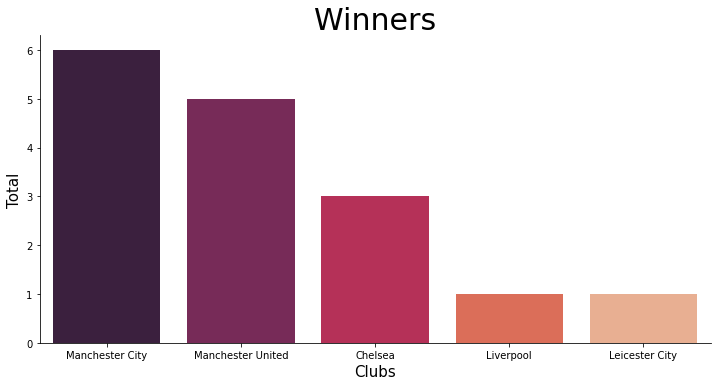

In [87]:
sns.catplot(x = 'Club', kind='count', data = first_position,aspect = 2, order = winners.index, palette = 'rocket')
plt.title('Winners', fontsize = 30)
plt.ylabel('Total', fontsize = 15)
plt.xlabel('Clubs', fontsize = 15)

In [11]:
relegation_position = df[df['Position'] > 16]
relegation_position['Club']

16                       Leeds
17                     Burnley
18                     Watford
19                Norwich City
36                     Burnley
                ...           
299        Derby County County
316             Wigan Athletic
317    Sheffield United United
318                   Charlton
319                    Watford
Name: Club, Length: 64, dtype: object

In [12]:
relegated = relegation_position['Club'].value_counts()
pd.DataFrame(relegated)

,Club
Hull City,4
Watford,4
Norwich City,4
Fulham,4
West Bromwich Albion,4
Burnley,4
Aston Villa,3
Queens Park Rangers,3
Sunderland,3
Wolves,2


In [13]:
europe_present = df[df['WIE'] == 'Yes']
europe_present['Club']

0        Manchester City
1              Liverpool
2                Chelsea
3      Tottenham Hotspur
5      Manchester United
             ...        
303              Arsenal
304    Tottenham Hotspur
309     Blackburn Rovers
312     Newcastle United
314       Westham United
Name: Club, Length: 115, dtype: object

In [14]:
europe = europe_present['Club'].value_counts()
pd.DataFrame(europe)

,Club
Arsenal,15
Chelsea,15
Tottenham Hotspur,15
Manchester United,15
Liverpool,14
Manchester City,13
Everton,4
Westham United,4
Aston Villa,3
Leicester City,2


In [15]:
top_4 = df[df['Position'] <5]
top_4['Club']

0        Manchester City
1              Liverpool
2                Chelsea
3      Tottenham Hotspur
20       Manchester City
             ...        
283            Liverpool
300    Manchester United
301              Chelsea
302            Liverpool
303              Arsenal
Name: Club, Length: 64, dtype: object

In [67]:
top_team = top_4['Club'].value_counts()
x = pd.DataFrame(top_team)
x

,Club
Chelsea,13
Manchester City,12
Manchester United,11
Liverpool,10
Arsenal,10
Tottenham Hotspur,7
Leicester City,1


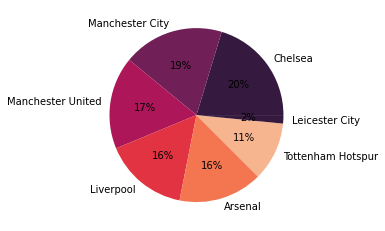

In [71]:
label = ['Chelsea', 'Manchester City', 'Manchester United', 'Liverpool', 'Arsenal',
         'Tottenham Hotspur', 'Leicester City']
palette_color = sns.color_palette('rocket')
plt.pie(top_team, labels= label, colors=palette_color, autopct='%.0f%%')
  
# displaying chart
plt.show()

Text(0.5, 6.79999999999999, 'Clubs')

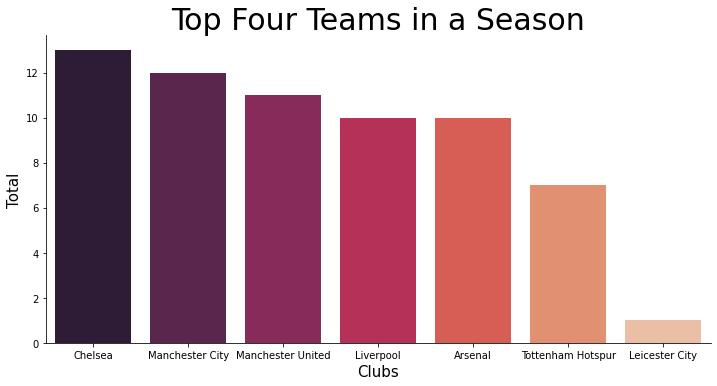

In [17]:
sns.catplot(x = 'Club', kind='count', data = top_4,aspect = 2, order = top_team.index, palette = 'rocket')
plt.title('Top Four Teams in a Season', fontsize = 30)
plt.ylabel('Total', fontsize = 15)
plt.xlabel('Clubs', fontsize = 15)

In [18]:
year_ten = df[df['Year'] > 2012]
year_ten.tail()

,Club,Won,Draw,Loss,GF,GA,GD,Points,Position,Year,...,YC,RC,Passes,Shots,Tackles,Clearances,Cleansheets,Saves,PLS,WIE
195,Newcastle United,11,8,19,45,68,-23,41,16,2013,...,71,4,14600,533,732,1584,6,3,Yes,Yes
196,Sunderland,9,12,17,41,54,-13,39,17,2013,...,62,3,13109,417,784,1155,11,0,Yes,No
197,Wigan Athletic,9,9,20,47,73,-26,36,18,2013,...,66,2,17927,500,716,901,5,0,Yes,No
198,Reading,6,10,22,43,73,-30,28,19,2013,...,45,1,11806,394,602,1300,5,0,No,No
199,Queens Park Rangers,4,13,21,30,60,-30,25,20,2013,...,59,3,13632,500,818,1363,7,0,Yes,No


In [19]:
passes = year_ten[['Club','Passes']]
passes

,Club,Passes
0,Manchester City,26132
1,Liverpool,23588
2,Chelsea,23179
3,Tottenham Hotspur,19165
4,Arsenal,18290
...,...,...
195,Newcastle United,14600
196,Sunderland,13109
197,Wigan Athletic,17927
198,Reading,11806


In [20]:
passes_mean = pd.DataFrame(passes.groupby('Club').mean().round()).reset_index()
passes_graph = pd.DataFrame(passes_mean.sort_values('Passes', ascending = False).head(5))
passes_graph

,Club,Passes
16,Manchester City,23906.0
15,Liverpool,21916.0
7,Chelsea,21358.0
0,Arsenal,20724.0
17,Manchester United,19957.0


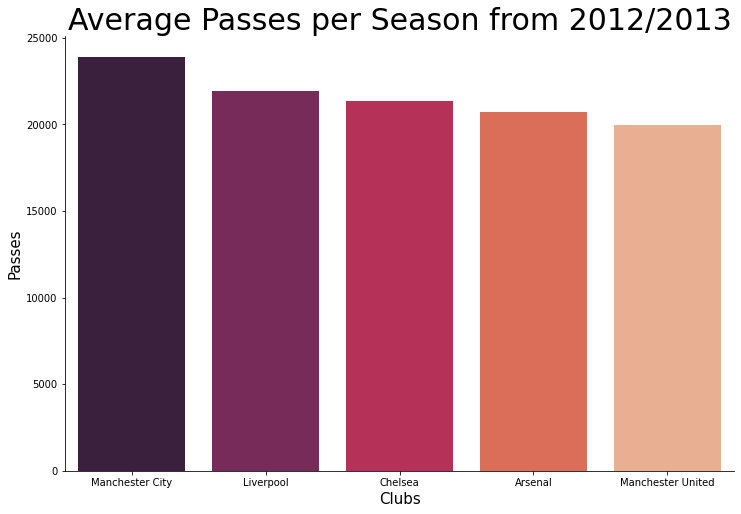

In [21]:
plt.figure(figsize=(12,8))
sns.barplot(x = 'Club',y = 'Passes', data = passes_graph,palette = 'rocket')
plt.title('Average Passes per Season from 2012/2013', fontsize = 30)
plt.ylabel('Passes', fontsize = 15)
plt.xlabel('Clubs', fontsize = 15)
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)

In [22]:
shots = year_ten[['Club','Shots']]
shots

,Club,Shots
0,Manchester City,713
1,Liverpool,729
2,Chelsea,592
3,Tottenham Hotspur,491
4,Arsenal,589
...,...,...
195,Newcastle United,533
196,Sunderland,417
197,Wigan Athletic,500
198,Reading,394


In [23]:
shots_mean = pd.DataFrame(shots.groupby('Club').mean().round()).reset_index()
shots_graph = pd.DataFrame(shots_mean.sort_values('Shots', ascending = False).head(6))
shots_graph

,Club,Shots
16,Manchester City,666.0
15,Liverpool,639.0
7,Chelsea,597.0
28,Tottenham Hotspur,566.0
0,Arsenal,538.0
17,Manchester United,524.0


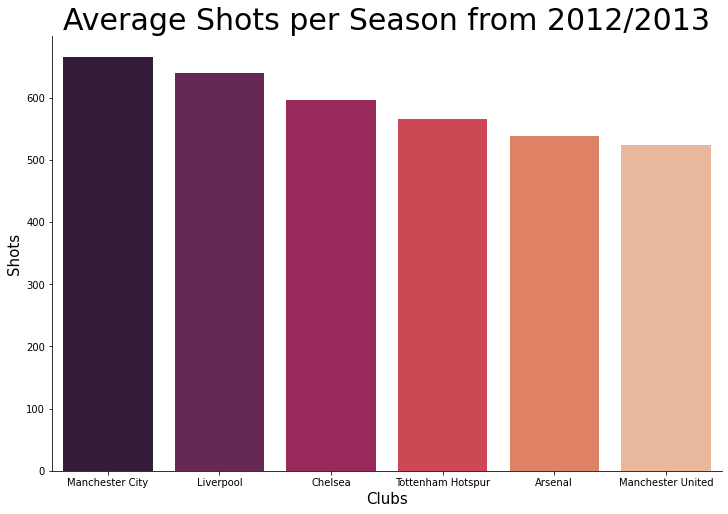

In [24]:
plt.figure(figsize=(12,8))
sns.barplot(x = 'Club',y = 'Shots', data = shots_graph,palette = 'rocket')
plt.title('Average Shots per Season from 2012/2013', fontsize = 30)
plt.ylabel('Shots', fontsize = 15)
plt.xlabel('Clubs', fontsize = 15)
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)

In [25]:
saves = year_ten[['Club','Saves']]
saves

,Club,Saves
0,Manchester City,62
1,Liverpool,83
2,Chelsea,84
3,Tottenham Hotspur,98
4,Arsenal,100
...,...,...
195,Newcastle United,3
196,Sunderland,0
197,Wigan Athletic,0
198,Reading,0


In [26]:
df['Owngoal'] = df['Owngoal'].fillna(0)

In [27]:
saves_mean = pd.DataFrame(saves.groupby('Club').mean().round()).reset_index()
saves_graph = pd.DataFrame(saves_mean.sort_values('Saves', ascending = False).head(5))
saves_graph

,Club,Saves
6,Cardiff City,149.0
13,Leeds,148.0
5,Burnley,131.0
3,Brentford,129.0
26,Sunderland,127.0


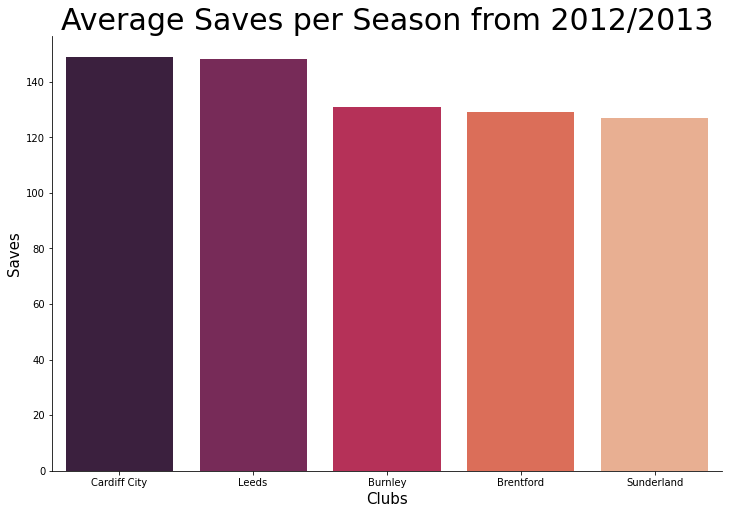

In [28]:
plt.figure(figsize=(12,8))
sns.barplot(x = 'Club',y = 'Saves', data = saves_graph,palette = 'rocket')
plt.title('Average Saves per Season from 2012/2013', fontsize = 30)
plt.ylabel('Saves', fontsize = 15)
plt.xlabel('Clubs', fontsize = 15)
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)

In [29]:
redcard = year_ten[['Club','RC']]
redcard_mean = pd.DataFrame(redcard.groupby('Club').mean
().round()).reset_index()
redcard_graph = pd.DataFrame(redcard_mean.sort_values('RC', ascending = False).tail(5))
redcard_graph

,Club,RC
22,Reading,1.0
18,Middlesbrough,1.0
15,Liverpool,1.0
6,Cardiff City,1.0
5,Burnley,1.0


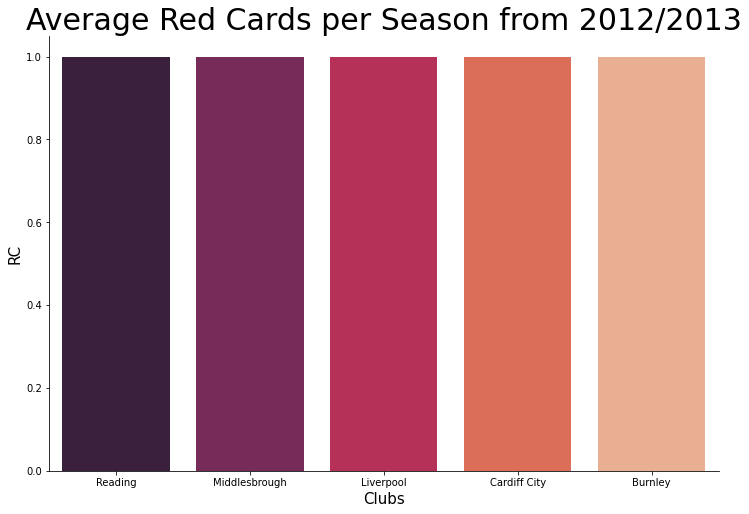

In [30]:
plt.figure(figsize=(12,8))
sns.barplot(x = 'Club',y = 'RC', data = redcard_graph,palette = 'rocket')
plt.title('Average Red Cards per Season from 2012/2013', fontsize = 30)
plt.ylabel('RC', fontsize = 15)
plt.xlabel('Clubs', fontsize = 15)
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)

In [31]:
won = df[['Club','Points ']]
won_mean = pd.DataFrame(won.groupby('Club').sum().round()).reset_index()
won_graph = pd.DataFrame(won_mean.sort_values('Points ', ascending = False).head(5))
won_graph

,Club,Points
23,Manchester United,1223
22,Manchester City,1219
12,Chelsea,1208
21,Liverpool,1178
0,Arsenal,1128


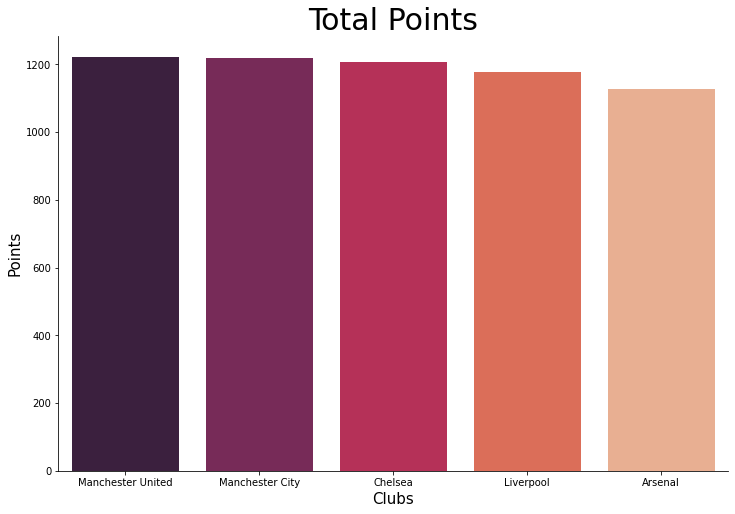

In [32]:
plt.figure(figsize=(12,8))
sns.barplot(x = 'Club',y = 'Points ', data = won_graph,palette = 'rocket')
plt.title('Total Points', fontsize = 30)
plt.ylabel('Points', fontsize = 15)
plt.xlabel('Clubs', fontsize = 15)
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)

In [33]:
yellowcard = year_ten[['Club','YC']]
yellowcard_mean = pd.DataFrame(yellowcard.groupby('Club').mean().round()).reset_index()
yellowcard_graph = pd.DataFrame(yellowcard_mean.sort_values('YC', ascending = False).tail(5))
yellowcard_graph

,Club,YC
4,Brighton,58.0
27,Swansea,55.0
14,Leicester City,54.0
15,Liverpool,50.0
22,Reading,45.0


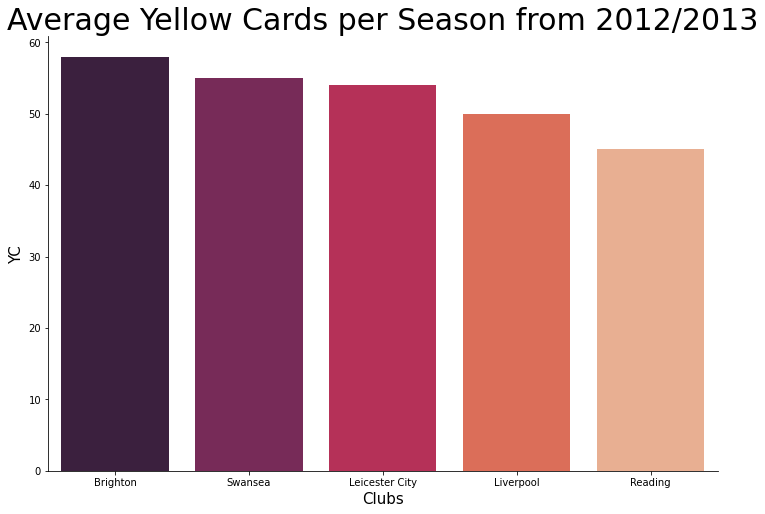

In [34]:
plt.figure(figsize=(12,8))
sns.barplot(x = 'Club',y = 'YC', data =   yellowcard_graph,palette = 'rocket')
plt.title('Average Yellow Cards per Season from 2012/2013', fontsize = 30)
plt.ylabel('YC', fontsize = 15)
plt.xlabel('Clubs', fontsize = 15)
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)

In [35]:
tackles = year_ten[['Club','Tackles']]
tackles_mean = pd.DataFrame(tackles.groupby('Club').sum().round()).reset_index()
tackles_graph = pd.DataFrame(tackles_mean.sort_values('Tackles', ascending = False).head(5))
tackles_graph

,Club,Tackles
24,Southampton,7218
9,Everton,6923
28,Tottenham Hotspur,6919
15,Liverpool,6908
7,Chelsea,6759


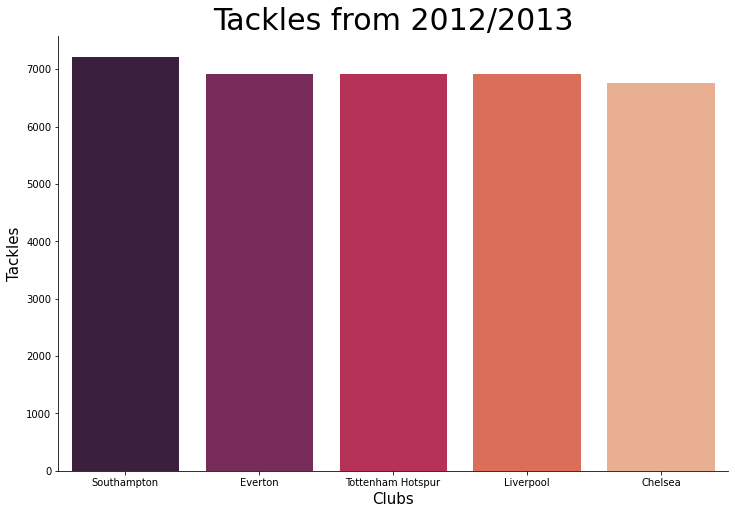

In [36]:
plt.figure(figsize=(12,8))
sns.barplot(x = 'Club',y = 'Tackles', data =   tackles_graph,palette = 'rocket')
plt.title('Tackles from 2012/2013', fontsize = 30)
plt.ylabel('Tackles', fontsize = 15)
plt.xlabel('Clubs', fontsize = 15)
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)

In [37]:
owngoal = year_ten[['Club','Owngoal']]
owngoal_mean = pd.DataFrame(owngoal.groupby('Club').sum().round()).reset_index()
owngoal_graph = pd.DataFrame(owngoal_mean.sort_values('Owngoal', ascending = False).head(5))
owngoal_graph

,Club,Owngoal
9,Everton,23.0
17,Manchester United,20.0
28,Tottenham Hotspur,20.0
31,Westham United,19.0
1,Aston Villa,19.0


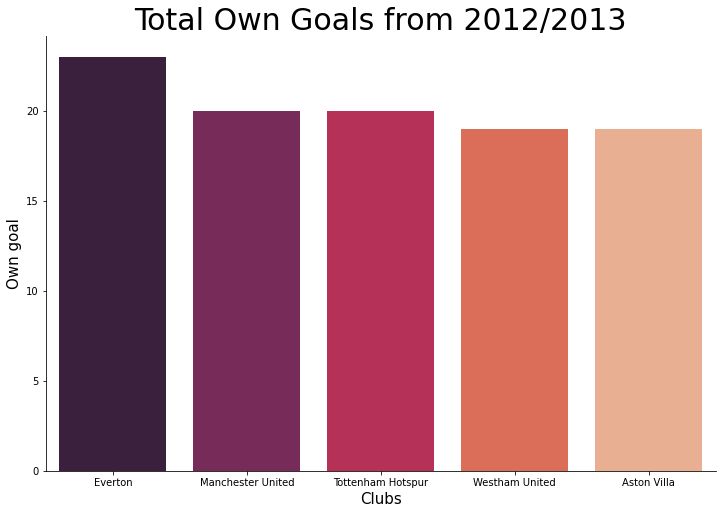

In [38]:
plt.figure(figsize=(12,8))
sns.barplot(x = 'Club',y = 'Owngoal', data =   owngoal_graph,palette = 'rocket')
plt.title('Total Own Goals from 2012/2013', fontsize = 30)
plt.ylabel('Own goal', fontsize = 15)
plt.xlabel('Clubs', fontsize = 15)
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)

In [39]:
yearpoint = df[['Year','Points ']]
Year_points = pd.DataFrame(yearpoint.groupby('Year').sum().round()).reset_index()
year_points_graph = pd.DataFrame(Year_points.sort_values('Points ', ascending = False).head(5))
#owngoal_graph
year_points_graph

,Year,Points
12,2019,1069
7,2014,1062
14,2021,1057
10,2017,1056
15,2022,1052


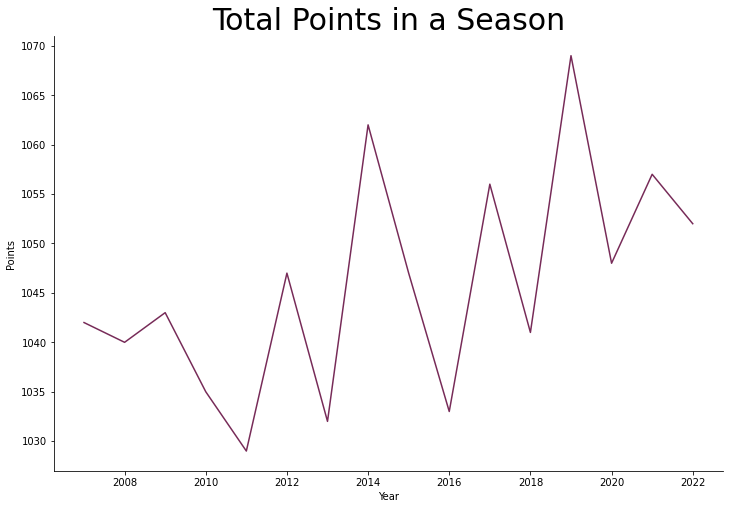

In [94]:
plt.figure(figsize=(12,8))
sns.lineplot(data=Year_points, x="Year", y="Points ", color  = '#772b58')
plt.title('Total Points in a Season', fontsize = 30)
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)

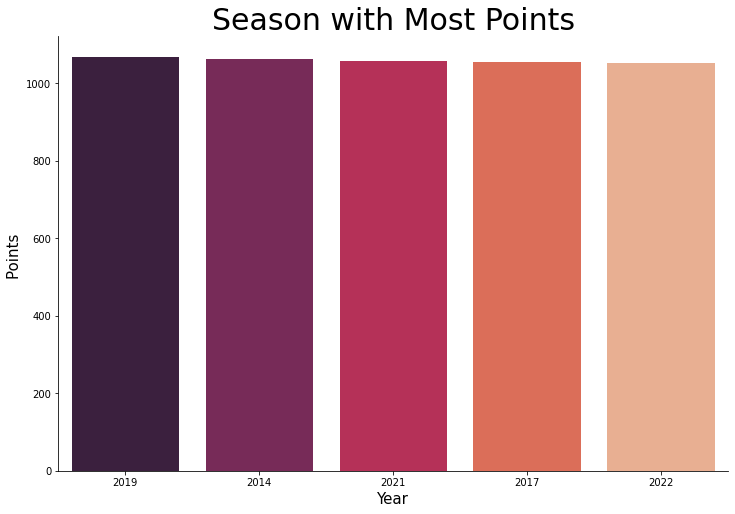

In [40]:
plt.figure(figsize=(12,8))
sns.barplot(x = 'Year',y = 'Points ',data = year_points_graph, palette = 'rocket',order=year_points_graph['Year'] )
plt.title('Season with Most Points', fontsize = 30)
plt.ylabel('Points ', fontsize = 15)
plt.xlabel('Year', fontsize = 15)
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)

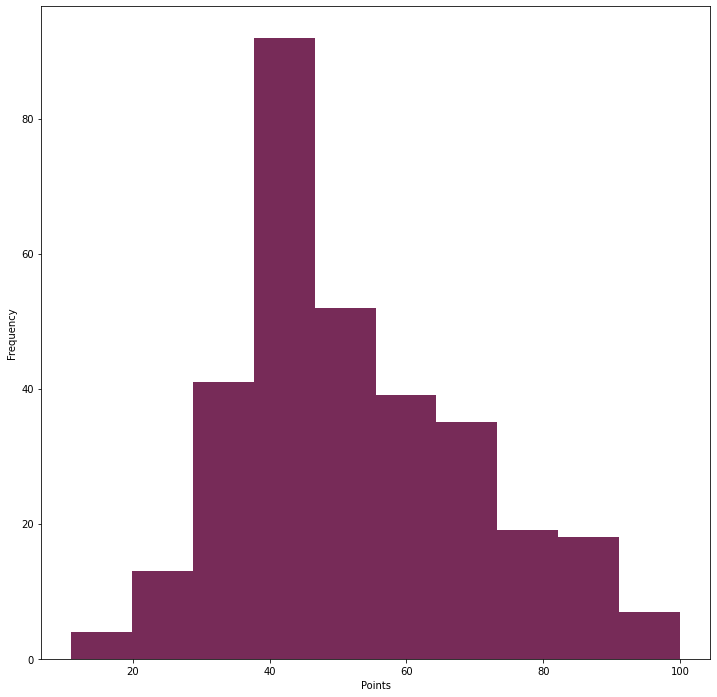

In [52]:
fig, ax = plt.subplots(figsize = (12,12))
df['Points '].plot(kind = "hist", color = '#772b58')
ax.set_xlabel("Points")
plt.show()

In [41]:
shot_point = np.corrcoef(df['Passes'], df['Points '])
shot_point

array([[1.        , 0.71447297],
       [0.71447297, 1.        ]])

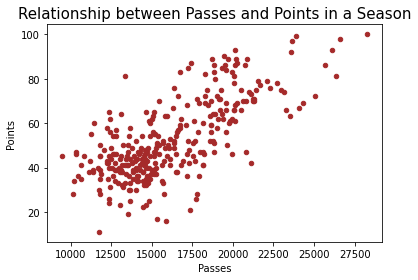

In [42]:
df.plot(kind = 'scatter', x = 'Passes', y = 'Points ', color= 'brown')
plt.title('Relationship between Passes and Points in a Season',  fontsize = 15)
plt.show()

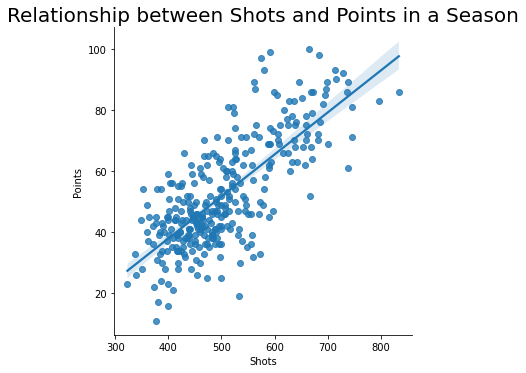

In [43]:
sns.lmplot(x="Shots",y="Points ",data=df,fit_reg=True, palette = 'green')
plt.title('Relationship between Shots and Points in a Season',  fontsize = 20)
plt.show()

## Data Splitting

In [ ]:
#the data is split in a 80:20 ratio to the trainset and testset 
#the data is not shuffled and random state is set to 3
from sklearn.model_selection import train_test_split
trainset, testset = train_test_split(df, test_size = 0.20, random_state = 3, 
                                     shuffle = True)

## Data Cleaning

In [ ]:
trainset.duplicated().sum()

0

In [ ]:
testset.duplicated().sum()

0

In [ ]:
trainset.isna().sum()

Club            0
Won             0
Draw            0
Loss            0
GF              0
GA              0
GD              0
Points          0
Position        0
Year            0
HW              0
HD              0
HL              0
HGF             0
HGA             0
HGD             0
HP              0
AW              0
AD              0
AL              0
AGF             0
AGA             0
AGD             0
AP              0
Touches         0
Owngoal         0
YC              0
RC              0
Passes          0
Shots           0
Tackles         0
Clearances      0
Cleansheets     0
Saves          27
PLS             0
WIE             0
dtype: int64

In [ ]:
testset.isna().sum()

Club            0
Won             0
Draw            0
Loss            0
GF              0
GA              0
GD              0
Points          0
Position        0
Year            0
HW              0
HD              0
HL              0
HGF             0
HGA             0
HGD             0
HP              0
AW              0
AD              0
AL              0
AGF             0
AGA             0
AGD             0
AP              0
Touches         0
Owngoal         0
YC              0
RC              0
Passes          0
Shots           0
Tackles         0
Clearances      0
Cleansheets     0
Saves          12
PLS             0
WIE             0
dtype: int64

In [ ]:
trainset = trainset.replace(r'^\s*$', np.nan, regex=True)
testset = testset.replace(r'^\s*$', np.nan, regex=True)

In [ ]:
imputer = KNNImputer(n_neighbors=3)

#fitting the KNNimputer on the trainset and transforming the trainset 
#using the imputer
trainset[['Won', 'Draw', 'Loss', 'GF', 'GA', 'GD', 'Position',
       'Year', 'HW', 'HD', 'HL', 'HGF', 'HGA', 'HGD', 'HP', 'AW', 'AD', 'AL',
       'AGF', 'AGA', 'AGD', 'AP', 'Touches', 'Owngoal', 'YC', 'RC', 'Passes',
       'Shots', 'Tackles', 'Clearances', 'Cleansheets', 'Saves']]=imputer.fit_transform(trainset[['Won', 'Draw', 'Loss', 'GF', 'GA',
                                    'GD', 'Position', 'Year', 'HW', 'HD', 'HL',
                                    'HGF', 'HGA', 'HGD', 'HP', 'AW', 'AD', 'AL', 
                                    'AGF', 'AGA', 'AGD', 'AP', 'Touches', 'Owngoal',
                                    'YC', 'RC', 'Passes', 'Shots', 'Tackles', 
                                    'Clearances', 'Cleansheets', 'Saves']])

In [ ]:
trainset.isna().sum()

Club           0
Won            0
Draw           0
Loss           0
GF             0
GA             0
GD             0
Points         0
Position       0
Year           0
HW             0
HD             0
HL             0
HGF            0
HGA            0
HGD            0
HP             0
AW             0
AD             0
AL             0
AGF            0
AGA            0
AGD            0
AP             0
Touches        0
Owngoal        0
YC             0
RC             0
Passes         0
Shots          0
Tackles        0
Clearances     0
Cleansheets    0
Saves          0
PLS            0
WIE            0
dtype: int64

In [ ]:
#transforming the testset 
#using the imputer
testset[['Won', 'Draw', 'Loss', 'GF', 'GA', 'GD', 'Position',
       'Year', 'HW', 'HD', 'HL', 'HGF', 'HGA', 'HGD', 'HP', 'AW', 'AD', 'AL',
       'AGF', 'AGA', 'AGD', 'AP', 'Touches', 'Owngoal', 'YC', 'RC', 'Passes',
       'Shots', 'Tackles', 'Clearances', 'Cleansheets', 'Saves']]=imputer.transform(testset[['Won', 'Draw', 'Loss', 'GF', 'GA',
                                    'GD', 'Position', 'Year', 'HW', 'HD', 'HL',
                                    'HGF', 'HGA', 'HGD', 'HP', 'AW', 'AD', 'AL', 
                                    'AGF', 'AGA', 'AGD', 'AP', 'Touches', 'Owngoal',
                                    'YC', 'RC', 'Passes', 'Shots', 'Tackles', 
                                    'Clearances', 'Cleansheets', 'Saves']])

In [ ]:
testset.isna().sum()

Club           0
Won            0
Draw           0
Loss           0
GF             0
GA             0
GD             0
Points         0
Position       0
Year           0
HW             0
HD             0
HL             0
HGF            0
HGA            0
HGD            0
HP             0
AW             0
AD             0
AL             0
AGF            0
AGA            0
AGD            0
AP             0
Touches        0
Owngoal        0
YC             0
RC             0
Passes         0
Shots          0
Tackles        0
Clearances     0
Cleansheets    0
Saves          0
PLS            0
WIE            0
dtype: int64

In [ ]:
trainset['Saves'] = trainset['Saves'].apply(np.ceil)
testset['Saves'] = testset['Saves'].apply(np.ceil)

In [ ]:
#checking the types of the variables in the trainset 
trainset.dtypes

Club            object
Won            float64
Draw           float64
Loss           float64
GF             float64
GA             float64
GD             float64
Points           int64
Position       float64
Year           float64
HW             float64
HD             float64
HL             float64
HGF            float64
HGA            float64
HGD            float64
HP             float64
AW             float64
AD             float64
AL             float64
AGF            float64
AGA            float64
AGD            float64
AP             float64
Touches        float64
Owngoal        float64
YC             float64
RC             float64
Passes         float64
Shots          float64
Tackles        float64
Clearances     float64
Cleansheets    float64
Saves          float64
PLS             object
WIE             object
dtype: object

In [ ]:
#checking the types of the variables in the testset 
testset.dtypes

Club            object
Won            float64
Draw           float64
Loss           float64
GF             float64
GA             float64
GD             float64
Points           int64
Position       float64
Year           float64
HW             float64
HD             float64
HL             float64
HGF            float64
HGA            float64
HGD            float64
HP             float64
AW             float64
AD             float64
AL             float64
AGF            float64
AGA            float64
AGD            float64
AP             float64
Touches        float64
Owngoal        float64
YC             float64
RC             float64
Passes         float64
Shots          float64
Tackles        float64
Clearances     float64
Cleansheets    float64
Saves          float64
PLS             object
WIE             object
dtype: object

In [ ]:
#putting values for the PLS variable
trainset['PLS'] = trainset['PLS'].replace({
    'Yes': 1,
    'No': 0
})

In [ ]:
#putting values for the WIE variable
trainset['WIE'] = trainset['WIE'].replace({
    'Yes': 1,
    'No': 0
})

In [ ]:
#putting values for the WIE variable
testset['WIE'] = testset['WIE'].replace({
    'Yes': 1,
    'No': 0
})

In [ ]:
#putting values for the PLS variable
testset['PLS'] = testset['PLS'].replace({
    'Yes': 1,
    'No': 0
})

## Data Transformation

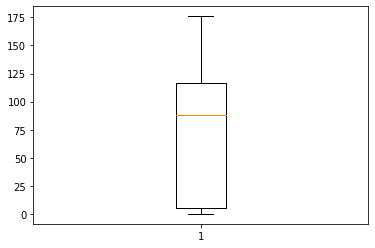

In [ ]:
plt.boxplot(trainset['Saves'])
plt.show()

In [ ]:
trainset_lst = ['Won', 'Draw', 'GD','HW', 'AW','Owngoal', 'YC', 
                'RC', 'Passes','Shots', 'Tackles', 'Clearances', 'Cleansheets', 
                'Saves']
for i in trainset_lst:
  for j in trainset_lst:
    if i!= j:
      corr_1=np.abs(trainset[i].corr(trainset[j]))
      #if corr_1 < 0.3:
       # print( f'{i} , is not correlated  with, {j}')
      if corr_1 > 0.8:
        print(f'{i}, is highly correlated with, {j}')
        

Won, is highly correlated with, GD
Won, is highly correlated with, HW
Won, is highly correlated with, AW
GD, is highly correlated with, Won
GD, is highly correlated with, HW
GD, is highly correlated with, AW
HW, is highly correlated with, Won
HW, is highly correlated with, GD
AW, is highly correlated with, Won
AW, is highly correlated with, GD


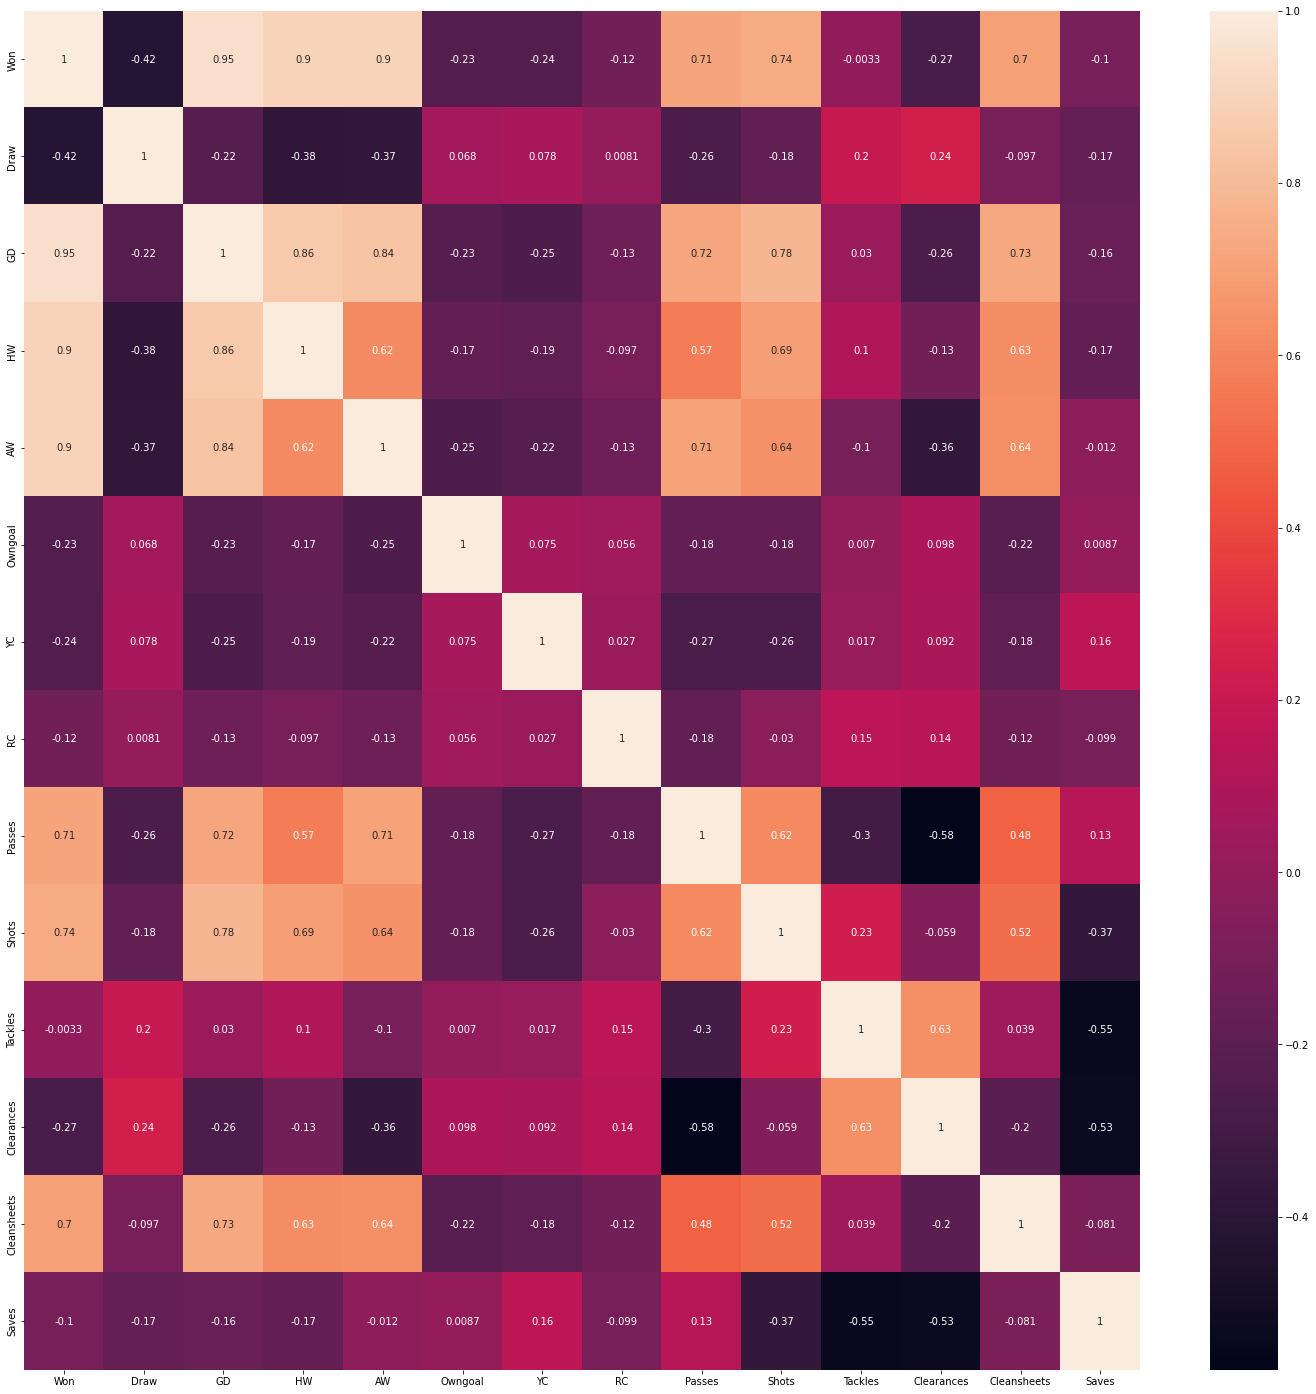

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(trainset[trainset_lst].corr(),annot=True,cmap='rocket')

In [ ]:
trainset = trainset.drop(['Club', 'Position', 'Year'], axis = 1)
testset = testset.drop(['Club', 'Position', 'Year'], axis = 1)

## Feature Engineering

In [ ]:
#creating the new variables for the trainset
trainset['WR'] = trainset['Won']/38
trainset['SGR'] = trainset['Shots']/trainset['GF']
trainset['PGR'] = trainset['Passes']/trainset['GF']
trainset['PSR'] = trainset['Passes']/trainset['Shots'] 
trainset['ACG'] = (trainset['RC'] + trainset['YC'])/38
trainset['SR'] = trainset['Saves']/(trainset['Saves'] + trainset['GA'])

In [ ]:
testset['WR'] = testset['Won']/38
testset['SGR'] = testset['Shots']/testset['GF']
testset['PGR'] = testset['Passes']/testset['GF']
testset['PSR'] = testset['Passes']/testset['Shots'] 
testset['ACG'] = (testset['RC'] + testset['YC'])/38
testset['SR'] = testset['Saves']/(testset['Saves'] + testset['GA'])

In [ ]:
trainset.shape

(256, 39)

In [ ]:
testset.shape

(64, 39)

## Methodology

In [ ]:
#libraries
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())


In [ ]:
#adding labels for trainset and testset
Xtrain = trainset.drop('Points ', axis = 1)
ytrain =  trainset['Points '].copy()
Xtest = testset.drop('Points ', axis = 1)
ytest =  testset['Points '].copy()

In [ ]:
Xtrain


,Won,Draw,Loss,GF,GA,GD,HW,HD,HL,HGF,...,Cleansheets,Saves,PLS,WIE,WR,SGR,PGR,PSR,ACG,SR
128,14.0,9.0,15.0,41.0,55.0,-14.0,8.0,4.0,7.0,22.0,...,10.0,121.0,1,0,0.368421,10.219512,398.585366,39.002387,1.447368,0.687500
203,20.0,9.0,9.0,66.0,41.0,25.0,13.0,3.0,3.0,39.0,...,14.0,0.0,1,1,0.526316,10.621212,296.424242,27.908702,1.210526,0.000000
25,19.0,6.0,11.0,62.0,47.0,15.0,10.0,4.0,5.0,32.0,...,11.0,109.0,1,0,0.500000,7.548387,244.387097,32.376068,1.342105,0.698718
67,15.0,9.0,14.0,54.0,46.0,8.0,10.0,4.0,5.0,30.0,...,14.0,94.0,1,0,0.394737,9.222222,305.444444,33.120482,1.552632,0.671429
65,19.0,9.0,10.0,65.0,54.0,11.0,10.0,6.0,3.0,33.0,...,16.0,122.0,1,1,0.500000,8.092308,295.415385,36.505703,2.026316,0.693182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,7.0,13.0,18.0,40.0,59.0,-19.0,5.0,7.0,7.0,24.0,...,7.0,4.0,1,0,0.184211,11.100000,354.300000,31.918919,1.710526,0.063492
256,8.0,11.0,19.0,47.0,66.0,-19.0,7.0,5.0,7.0,30.0,...,8.0,4.0,1,0,0.210526,11.680851,310.978723,26.622951,1.710526,0.057143
131,12.0,11.0,15.0,42.0,52.0,-10.0,8.0,6.0,5.0,20.0,...,9.0,119.0,1,0,0.315789,10.500000,432.595238,41.199546,1.605263,0.695906
249,13.0,11.0,14.0,41.0,55.0,-14.0,10.0,6.0,3.0,28.0,...,13.0,3.0,1,0,0.342105,11.926829,287.609756,24.114519,1.552632,0.051724


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
forest_reg = RandomForestRegressor(n_estimators=10, random_state=7)
rmse_scores = -cross_val_score(forest_reg, Xtrain, ytrain,
                         scoring="neg_root_mean_squared_error", cv=5)
display_scores(rmse_scores)

Scores: [2.26490788 2.33779685 2.62327441 1.64573126 1.61074821]
Mean: 2.0964917216177965
Standard deviation: 0.40080516958156953


The algorithm produced an RMSE score of 2.10

In [ ]:

# specify the hyperparameters and their values
param_grid = {
      'n_estimators': [3, 10, 30, 40, 50, 60],
    'max_depth': [4, 6, 8, 10, None]
}

forest_reg = RandomForestRegressor(random_state=7)

# we'll use 10-fold cross-validation
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_root_mean_squared_error', 
                           return_train_score=True, verbose=2)

grid_search.fit(Xtrain, ytrain)

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=8, n_estimators=50, random_state=7)

In [ ]:
-grid_search.best_score_

1.8699877083628937

In [ ]:
cv_results = pd.DataFrame(grid_search.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]
cv_results["mean_train_score"] = -cv_results["mean_train_score"]
cv_results["mean_test_score"] = -cv_results["mean_test_score"]
cv_results["diff, %"] = 100*(cv_results["mean_train_score"]-cv_results["mean_test_score"]
                                                     )/cv_results["mean_train_score"]

cv_results.sort_values('mean_test_score')

,params,mean_train_score,mean_test_score,"diff, %"
16,"{'max_depth': 8, 'n_estimators': 50}",0.727044,1.869988,-157.204062
15,"{'max_depth': 8, 'n_estimators': 40}",0.721159,1.870036,-159.309730
14,"{'max_depth': 8, 'n_estimators': 30}",0.755726,1.877015,-148.372322
17,"{'max_depth': 8, 'n_estimators': 60}",0.726644,1.878468,-158.512730
10,"{'max_depth': 6, 'n_estimators': 50}",0.817277,1.881325,-130.194106
11,"{'max_depth': 6, 'n_estimators': 60}",0.813581,1.884033,-131.572738
22,"{'max_depth': 10, 'n_estimators': 50}",0.728285,1.885685,-158.921368
28,"{'max_depth': None, 'n_estimators': 50}",0.729208,1.886464,-158.700247
23,"{'max_depth': 10, 'n_estimators': 60}",0.728455,1.889780,-159.422924
21,"{'max_depth': 10, 'n_estimators': 40}",0.725365,1.893043,-160.978032


In [ ]:
# put them into a separate variable for convenience
feature_importances = grid_search.best_estimator_.feature_importances_

# the order of the features in `feature_importances` is the same as in the Xtrain dataframe,
# so we can "zip" the two and print in the descending order:

for k, v in sorted(zip(feature_importances, Xtest.columns), reverse=True):
    print(f"{v}: {k:.3f}")

Won: 0.449
WR: 0.442
GD: 0.067
Loss: 0.020
HP: 0.006
HL: 0.002
HGF: 0.001
HGD: 0.001
GA: 0.001
AL: 0.001
Draw: 0.001
AGD: 0.001
Tackles: 0.001
AP: 0.001
ACG: 0.001
HW: 0.001
YC: 0.001
AW: 0.001
Shots: 0.000
Touches: 0.000
Clearances: 0.000
AGA: 0.000
AD: 0.000
Cleansheets: 0.000
Passes: 0.000
PGR: 0.000
SR: 0.000
HGA: 0.000
RC: 0.000
SGR: 0.000
PSR: 0.000
HD: 0.000
Saves: 0.000
GF: 0.000
AGF: 0.000
Owngoal: 0.000
PLS: 0.000
WIE: 0.000


In [ ]:
best_model = grid_search.best_estimator_

yhat = best_model.predict(Xtest)

final_mse = mean_squared_error(ytest, yhat)
final_rmse = np.sqrt(final_mse)
final_rmse

2.3411223443273856

## Support Vector Machine

In [ ]:
from sklearn import svm

In [ ]:
param_grid = {
    #'kernel': ['linear', 'poly', 'rbf'],
    'kernel': ['linear'],
      'C': [0.001, 0.01],
    'gamma': [0.0001, 0.001]
}

svm_reg =svm.SVR(degree = 3)
# we'll use 10-fold cross-validation
grid_search = GridSearchCV(svm_reg, param_grid, cv=5,
                           scoring='neg_root_mean_squared_error', 
                           return_train_score=True, verbose=2)

grid_search.fit(Xtrain, ytrain)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ...............C=0.001, gamma=0.0001, kernel=linear; total time=   2.9s
[CV] END ...............C=0.001, gamma=0.0001, kernel=linear; total time=   1.9s
[CV] END ...............C=0.001, gamma=0.0001, kernel=linear; total time=   3.2s
[CV] END ...............C=0.001, gamma=0.0001, kernel=linear; total time=   1.2s
[CV] END ...............C=0.001, gamma=0.0001, kernel=linear; total time=   1.5s
[CV] END ................C=0.001, gamma=0.001, kernel=linear; total time=   5.2s
[CV] END ................C=0.001, gamma=0.001, kernel=linear; total time=   1.9s
[CV] END ................C=0.001, gamma=0.001, kernel=linear; total time=   3.2s
[CV] END ................C=0.001, gamma=0.001, kernel=linear; total time=   1.2s
[CV] END ................C=0.001, gamma=0.001, kernel=linear; total time=   1.5s
[CV] END ................C=0.01, gamma=0.0001, kernel=linear; total time=   7.1s
[CV] END ................C=0.01, gamma=0.0001, ke

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.001, 0.01], 'gamma': [0.0001, 0.001],
                         'kernel': ['linear']},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=2)

In [ ]:
grid_search.best_estimator_

SVR(C=0.01, gamma=0.0001, kernel='linear')

In [ ]:
-grid_search.best_score_

1.7573433265841267

In [ ]:
# put them into a separate variable for convenience
feature_importances = grid_search.best_estimator_.coef_

# the order of the features in `feature_importances` is the same as in the Xtrain dataframe,
# so we can "zip" the two and print in the descending order:

for k, v in sorted(zip(feature_importances, Xtest.columns), reverse=True):
    print(f"{v}: {k:.3f}")

TypeError: ignored

In [ ]:
best_model.coef_[0]


array([ 4.60064975e-01, -1.19905975e-01, -3.20159000e-01,  1.18096084e-02,
       -4.09548817e-02,  5.27644901e-02,  1.83586204e-01, -3.20262596e-02,
       -1.30330739e-01, -5.00532870e-02,  4.35720574e-02,  6.76753479e-02,
        5.18946813e-01,  2.06407284e-01, -1.07879715e-01, -9.85275689e-02,
       -2.94377969e-02,  1.54730609e-02, -4.49108578e-02,  5.11342137e-01,
        5.13904922e-04,  2.91131537e-02,  9.83095049e-02,  6.19341247e-02,
        2.28081266e-04, -1.69935695e-02, -1.77987292e-03, -8.89333541e-05,
        7.33827798e-02, -7.71224866e-04,  3.61332564e-02,  3.78342741e-02,
        1.21069730e-02,  1.19722896e-01, -4.19287435e-03, -1.45710174e-01,
        4.21693762e-03,  7.55527094e-03])

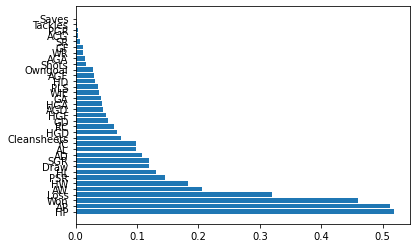

In [ ]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.show()
features_names = Xtrain.columns
f_importances(abs(best_model.coef_[0]), features_names, top=35) 

In [ ]:
def f_importances(coef, names, top=-1):
  imp = coef
  j = 0 
  z = {}
  for i in imp:
    if i >= 0.05:
      z[names[j]]= i
      j += 1
    # Show all features
  return z
features_names = Xtrain.columns
f_importances(abs(best_model.coef_[0]), features_names, top=20) 

{'Won': 0.46006497484716186,
 'Draw': 0.11990597481315103,
 'Loss': 0.3201590000339931,
 'GF': 0.0527644900981559,
 'GA': 0.18358620438469753,
 'GD': 0.13033073874191492,
 'HW': 0.050053287020442816,
 'HD': 0.06767534792584436,
 'HL': 0.5189468125035257,
 'HGF': 0.20640728414093254,
 'HGA': 0.10787971519798639,
 'HGD': 0.0985275689429367,
 'HP': 0.5113421372248124,
 'AW': 0.0983095048782463,
 'AD': 0.06193412466180766,
 'AL': 0.07338277978442587,
 'AGF': 0.11972289567085329,
 'AGA': 0.14571017411252107}

In [ ]:
:best_model = grid_search.best_estimator_

yhat = best_model.predict(Xtest)

final_mse = mean_squared_error(ytest, yhat)
final_rmse = np.sqrt(final_mse)
final_rmse

2.336255155471728

## XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
params_grid = {
    'n_estimators': [5, 10, 15, 20, 30, 60],
    'colsample_bytree': [0.01,0.1,0.5,0.9, 1],
    'learning_rate':[0.01,0.1,0.5,1]
}

xg_reg = xgb.XGBRegressor(objective ='reg:linear', max_depth = 6, alpha = 10, random_state = 7)
# we'll use 10-fold cross-validation
grid_search = GridSearchCV(xg_reg, params_grid, cv=5,
                           scoring='neg_root_mean_squared_error', 
                           return_train_score=True, verbose=2)

grid_search.fit(Xtrain, ytrain)

In [ ]:
grid_search.best_estimator_

XGBRegressor(alpha=10, max_depth=6, n_estimators=60, random_state=7)

In [ ]:
-grid_search.best_score_

1.2426878747331673

In [ ]:
cv_results = pd.DataFrame(grid_search.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]
cv_results["mean_train_score"] = -cv_results["mean_train_score"]
cv_results["mean_test_score"] = -cv_results["mean_test_score"]
cv_results["diff, %"] = 100*(cv_results["mean_train_score"]-cv_results["mean_test_score"]
                                                     )/cv_results["mean_train_score"]

cv_results.sort_values('mean_test_score')

,params,mean_train_score,mean_test_score,"diff, %"
107,"{'colsample_bytree': 1, 'learning_rate': 0.1, ...",0.293619,1.242688,-323.231459
83,"{'colsample_bytree': 0.9, 'learning_rate': 0.1...",0.293876,1.257419,-327.873587
59,"{'colsample_bytree': 0.5, 'learning_rate': 0.1...",0.319628,1.502144,-369.966068
89,"{'colsample_bytree': 0.9, 'learning_rate': 0.5...",0.000519,2.226511,-428530.725292
88,"{'colsample_bytree': 0.9, 'learning_rate': 0.5...",0.010732,2.226645,-20648.467568
...,...,...,...,...
96,"{'colsample_bytree': 1, 'learning_rate': 0.01,...",52.642383,52.588412,0.102525
72,"{'colsample_bytree': 0.9, 'learning_rate': 0.0...",52.642383,52.588761,0.101860
48,"{'colsample_bytree': 0.5, 'learning_rate': 0.0...",52.646999,52.602291,0.084920
24,"{'colsample_bytree': 0.1, 'learning_rate': 0.0...",52.676966,52.633534,0.082448


In [ ]:
# put them into a separate variable for convenience
feature_importances = grid_search.best_estimator_.feature_importances_

# the order of the features in `feature_importances` is the same as in the Xtrain dataframe,
# so we can "zip" the two and print in the descending order:

for k, v in sorted(zip(feature_importances, Xtest.columns), reverse=True):
    print(f"{v}: {k:.3f}")

Won: 0.476
GD: 0.293
Loss: 0.190
HP: 0.019
HGD: 0.011
Touches: 0.001
Clearances: 0.001
AP: 0.001
GA: 0.001
SR: 0.001
AW: 0.000
AL: 0.000
Draw: 0.000
HGF: 0.000
YC: 0.000
AGA: 0.000
Passes: 0.000
HW: 0.000
Owngoal: 0.000
HD: 0.000
Shots: 0.000
HL: 0.000
SGR: 0.000
Saves: 0.000
ACG: 0.000
PLS: 0.000
PSR: 0.000
AGF: 0.000
Tackles: 0.000
PGR: 0.000
GF: 0.000
RC: 0.000
AD: 0.000
Cleansheets: 0.000
HGA: 0.000
AGD: 0.000
WR: 0.000
WIE: 0.000


In [ ]:
best_model = grid_search.best_estimator_

yhat = best_model.predict(Xtest)

final_mse = mean_squared_error(ytest, yhat)
final_rmse = np.sqrt(final_mse)
final_rmse

1.9038184058115228